# Decision tree

A decision tree is a flowchart-like structure in which an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition the data into subsets based on the feature values. The goal of the decision tree algorithm is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data). For each observation, it recursively traverses the tree from the root to a leaf node, then it assigns the class label of the corresponding leaf node as the prediction of the decision tree.

A decision tree classifier is a type of decision tree algorithm that is used for classification problems. It is a supervised learning algorithm that can be used to solve both binary and multiclass classification problems. The decision tree classifier works by recursively partitioning the data into subsets based on the feature values. The goal of the decision tree classifier is to create a model that can predict the class label of new instances by learning simple decision rules inferred from the training data

## Data collection

Source - GEO Datasets - GSE68607

C9ORF72 GGGGCC expanded repeats produce splicing dysregulation which correlates with disease severity in amyotrophic lateral sclerosis .This data set is of 45 samples of which 15 are control and 30 are diseased. The genes were chosen based on the P.value. There are both up regulated and down regulated genes.

The genes were first filtered based on the P.value. Then control and diseased samples were extracted from GSE68607(GEO-accession number). The target variable is set as 'outcome' based on the sample taken.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [21]:
df = pd.read_csv("ALS geodataset.csv")

In [22]:
df.head()

,LRRFIP1,THADA,RGS6,ZNF638,MMP23B,PLXNB1,RP3-377D14.1,USP34,THADA.1,CYorf15A,...,FOXO4,TRIM59,MUC4.1,MUC4.2,USP39,LRRFIP1.1,MMP23B.1,GRM8,TRIM59.1,outcome
0,9.494352,2.973412,4.060297,3.327416,4.910209,-3.678679,6.033708,3.734166,2.973412,7.211260,...,4.610789,6.233121,4.281915,4.281915,9.077699,11.352656,4.910209,1.937028,6.233121,0
1,9.652347,1.041723,4.048302,-1.711181,3.676303,-2.834622,6.142283,4.108245,1.041723,7.042854,...,5.150122,6.384305,3.947593,3.947593,9.037315,11.339814,3.676303,3.893425,6.384305,0
2,10.032375,2.944126,4.073012,3.370234,4.816267,-3.444682,6.042527,4.534576,2.944126,6.876900,...,5.235859,6.954674,-7.450973,-7.450973,9.412453,11.233254,4.816267,4.037966,6.954674,0
3,9.770127,2.484607,4.132808,3.346088,4.360065,-2.318873,6.029438,3.598812,2.484607,7.280534,...,4.535613,6.557508,3.338574,3.338574,9.243624,11.281713,4.360065,3.634348,6.557508,0
4,9.684129,2.352003,4.006768,3.999665,4.097268,2.806521,6.013487,4.684030,2.352003,6.488243,...,5.701094,6.594414,4.009281,4.009281,9.403549,11.217501,4.097268,3.822086,6.594414,0


In [23]:
df.columns

Index(['LRRFIP1', 'THADA', 'RGS6', 'ZNF638', 'MMP23B', 'PLXNB1',
       'RP3-377D14.1', 'USP34', 'THADA.1', 'CYorf15A', 'CHRNA6', 'THSD7B',
       'THADA.2', 'MTIF2', 'FAM18B2', 'AC092299.1', 'AC069287.3', 'ARMC10',
       'FAM123C', 'USP34.1', 'RP11-339I24.1', 'ZKSCAN4', 'LL22NC03-80A10.2',
       'FAM123C.1', 'RPL21', 'SR140', 'MUC4', 'EHBP1', 'FOXO4', 'TRIM59',
       'MUC4.1', 'MUC4.2', 'USP39', 'LRRFIP1.1', 'MMP23B.1', 'GRM8',
       'TRIM59.1', 'outcome'],
      dtype='object')

# Exploratory Data Analysis

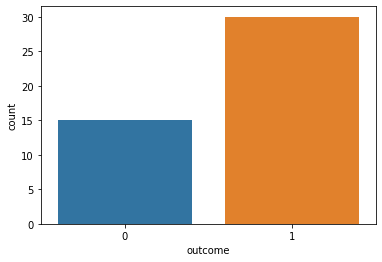

In [25]:
sns.countplot(df['outcome'])
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='outcome'>

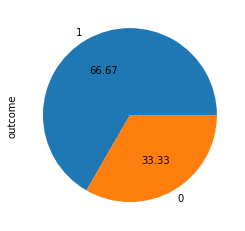

In [26]:
df['outcome'].value_counts().plot(kind='pie',autopct='%.2f')

(array([11., 12.,  6.,  1.,  0.,  0.,  0.,  1.,  4., 10.]),
 array([ 2.964295,  3.671103,  4.377911,  5.084719,  5.791527,  6.498335,
         7.205143,  7.911951,  8.618759,  9.325567, 10.032375]),
 <BarContainer object of 10 artists>)

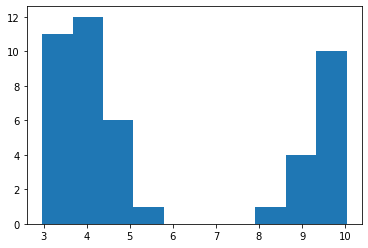

In [27]:
plt.hist(df['LRRFIP1'],bins=10)

<AxesSubplot:xlabel='THADA', ylabel='Density'>

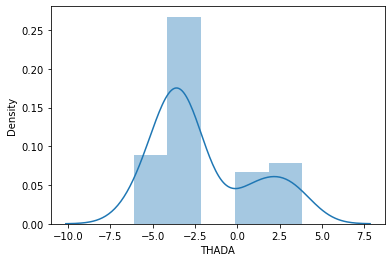

In [28]:
sns.distplot(df['THADA'])

<AxesSubplot:xlabel='LRRFIP1', ylabel='THADA'>

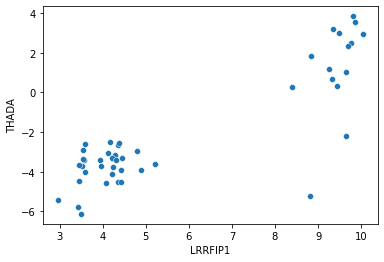

In [29]:
sns.scatterplot(df['LRRFIP1'],df['THADA'])
     

# Separating the variables

In [30]:
x = df.drop(['outcome'],axis=1)
y = df[['outcome']]

In [31]:
x.head()

,LRRFIP1,THADA,RGS6,ZNF638,MMP23B,PLXNB1,RP3-377D14.1,USP34,THADA.1,CYorf15A,...,EHBP1,FOXO4,TRIM59,MUC4.1,MUC4.2,USP39,LRRFIP1.1,MMP23B.1,GRM8,TRIM59.1
0,9.494352,2.973412,4.060297,3.327416,4.910209,-3.678679,6.033708,3.734166,2.973412,7.211260,...,8.361821,4.610789,6.233121,4.281915,4.281915,9.077699,11.352656,4.910209,1.937028,6.233121
1,9.652347,1.041723,4.048302,-1.711181,3.676303,-2.834622,6.142283,4.108245,1.041723,7.042854,...,8.522570,5.150122,6.384305,3.947593,3.947593,9.037315,11.339814,3.676303,3.893425,6.384305
2,10.032375,2.944126,4.073012,3.370234,4.816267,-3.444682,6.042527,4.534576,2.944126,6.876900,...,8.316922,5.235859,6.954674,-7.450973,-7.450973,9.412453,11.233254,4.816267,4.037966,6.954674
3,9.770127,2.484607,4.132808,3.346088,4.360065,-2.318873,6.029438,3.598812,2.484607,7.280534,...,8.023731,4.535613,6.557508,3.338574,3.338574,9.243624,11.281713,4.360065,3.634348,6.557508
4,9.684129,2.352003,4.006768,3.999665,4.097268,2.806521,6.013487,4.684030,2.352003,6.488243,...,8.275141,5.701094,6.594414,4.009281,4.009281,9.403549,11.217501,4.097268,3.822086,6.594414


In [32]:
y.head()

,outcome
0,0
1,0
2,0
3,0
4,0


# Splitting the data

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [34]:
x_train.shape

(31, 37)

In [35]:
x_test.shape

(14, 37)

# Feature selection

## Pearson correlation

In [36]:
x_train.corr

<bound method DataFrame.corr of      LRRFIP1     THADA      RGS6    ZNF638     MMP23B    PLXNB1  RP3-377D14.1  \
42  4.387066 -2.549789 -0.335785  2.341129  11.556823  2.443014     12.108380   
30  4.221886 -4.110894  0.832728  1.106573  11.446033  2.840250     12.256924   
32  3.959133 -3.707614  1.729942 -1.679992  11.551494  1.795559     12.169826   
1   9.652347  1.041723  4.048302 -1.711181   3.676303 -2.834622      6.142283   
23  3.586044 -4.030581  2.864159 -2.647379  11.461797  2.845965     12.736761   
25  3.586343 -2.590903 -1.593394 -1.674630  11.320310  2.450849     12.011121   
27  3.417708 -5.783022 -3.208435 -4.253024  11.747987  3.262146     12.043913   
19  4.885887 -3.924116  1.075940 -2.075750  11.608237  1.733114     12.703477   
35  5.222698 -3.621023 -2.629663 -2.002624  11.364012  3.734591     11.865007   
10  9.868436  3.564868  3.452636  3.991394   3.995517 -3.004276      5.567812   
4   9.684129  2.352003  4.006768  3.999665   4.097268  2.806521      6.013487

In [38]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(x_train,0.9)
len(set(corr_features))

25

In [40]:
corr_features

{'AC069287.3',
 'AC092299.1',
 'ARMC10',
 'CHRNA6',
 'CYorf15A',
 'EHBP1',
 'FAM123C',
 'FAM123C.1',
 'FAM18B2',
 'FOXO4',
 'LL22NC03-80A10.2',
 'LRRFIP1.1',
 'MMP23B',
 'MMP23B.1',
 'MTIF2',
 'MUC4.2',
 'RP11-339I24.1',
 'RP3-377D14.1',
 'RPL21',
 'SR140',
 'THADA.1',
 'TRIM59',
 'TRIM59.1',
 'USP39',
 'ZKSCAN4'}

In [41]:
train_x= x_train.drop(corr_features,axis=1)
train_x

,LRRFIP1,THADA,RGS6,ZNF638,PLXNB1,USP34,THSD7B,THADA.2,USP34.1,MUC4,MUC4.1,GRM8
42,4.387066,-2.549789,-0.335785,2.341129,2.443014,4.307245,4.442345,-2.510189,3.301537,-7.475838,-7.496862,-3.146748
30,4.221886,-4.110894,0.832728,1.106573,2.840250,4.007550,4.465275,-4.052586,-6.076564,-6.552048,2.855514,0.972003
32,3.959133,-3.707614,1.729942,-1.679992,1.795559,3.448452,0.331875,-3.658977,3.680335,-5.214754,3.088543,1.859429
1,9.652347,1.041723,4.048302,-1.711181,-2.834622,4.108245,2.594520,3.262082,4.328063,3.516237,3.947593,3.893425
23,3.586044,-4.030581,2.864159,-2.647379,2.845965,1.654435,4.251854,-3.967002,1.935608,1.934495,0.498037,2.455753
25,3.586343,-2.590903,-1.593394,-1.674630,2.450849,4.237262,-3.139817,-2.551092,2.481772,-4.105153,-7.369860,-2.917247
27,3.417708,-5.783022,-3.208435,-4.253024,3.262146,-8.581332,-4.718669,-5.711027,-8.972887,-10.242843,-10.270150,-0.896016
19,4.885887,-3.924116,1.075940,-2.075750,1.733114,-5.805618,4.027299,-3.859340,3.937799,-3.591492,5.105906,-0.172333
35,5.222698,-3.621023,-2.629663,-2.002624,3.734591,-4.231707,-4.362481,2.707120,4.080518,-9.712645,-9.735484,1.118679
10,9.868436,3.564868,3.452636,3.991394,-3.004276,4.507389,4.507417,1.059062,5.447287,2.021562,3.751630,3.648554


In [42]:
test_x=x_test.drop(corr_features,axis=1)
test_x

,LRRFIP1,THADA,RGS6,ZNF638,PLXNB1,USP34,THSD7B,THADA.2,USP34.1,MUC4,MUC4.1,GRM8
41,3.927951,-3.407865,0.625626,1.291287,2.339537,4.051089,3.547001,3.247010,4.552660,3.731118,2.482538,-2.890412
17,3.562772,-3.399518,0.897198,-2.252563,3.677969,3.483826,-3.995434,-3.350960,3.363415,-8.504064,-8.533670,1.595009
43,4.230561,-3.772424,1.211193,3.293333,-3.259810,3.976234,3.870262,-3.708675,5.108105,0.441683,5.142780,1.379122
14,9.258886,1.205139,3.959736,-0.155981,-3.006811,4.195192,3.083848,3.372554,4.406601,1.983859,4.450916,3.225381
44,4.317449,-3.420387,-0.522518,2.743454,1.803664,-0.765126,-3.464521,-3.364231,4.484494,-3.329633,5.272234,-3.008029
29,4.295255,-3.160103,-2.363163,-1.966432,2.957547,-4.777610,-3.676827,0.036697,4.298974,-8.327059,-8.346675,0.289582
12,9.815094,3.842083,3.586602,4.475351,-2.623598,4.915028,-3.668428,1.625119,5.092280,-8.012350,-8.032293,3.872800
13,9.449920,0.340549,4.354846,3.316879,-3.177312,4.092825,2.961306,2.599274,3.247368,-4.727042,4.180802,3.830884
0,9.494352,2.973412,4.060297,3.327416,-3.678679,3.734166,1.581672,-1.575419,4.864425,3.820520,4.281915,1.937028
2,10.032375,2.944126,4.073012,3.370234,-3.444682,4.534576,3.144821,2.783184,4.896634,3.424110,-7.450973,4.037966


In [43]:
y_test.shape

(14, 1)

In [44]:
y_train.shape

(31, 1)

In [45]:
train_x.shape

(31, 12)

In [46]:
test_x.shape

(14, 12)

# Training with the model

## Decision Tree classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
Clf = DecisionTreeClassifier()

In [49]:
Clf.fit(train_x,y_train)

DecisionTreeClassifier()

In [50]:
y_pred=Clf.predict(test_x)

In [51]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))

Actual 0.9285714285714286


In [53]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[11] <= 3.037\ngini = 0.412\nsamples = 31\nvalue = [9, 22]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

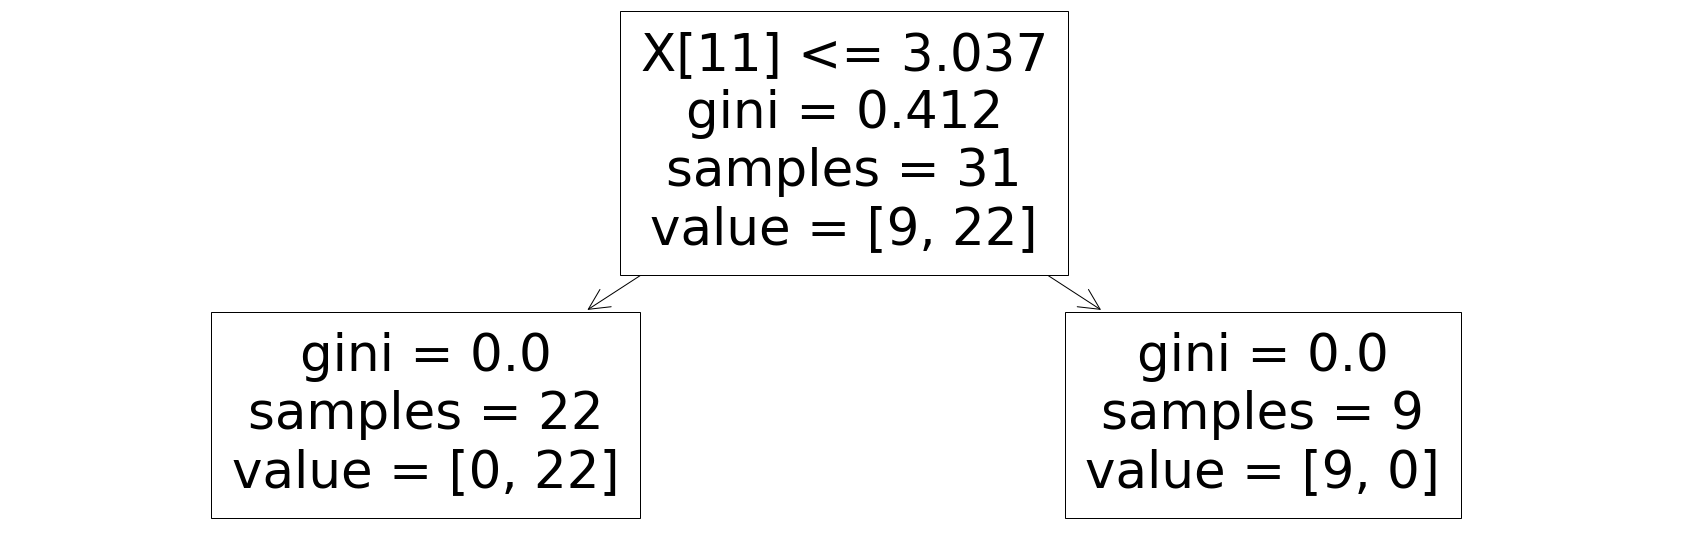

In [54]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 30,10

plot_tree(Clf)

## prediction

In [55]:
import numpy as np

In [59]:
predict_sample = [10.186781,-3.529923,-0.887668,-2.457289,-3.121166,3.425542,-3.654626,-3.484525,4.134307,3.763114,-1.908931,4.083599
]

In [60]:
pred_sample=np.array([predict_sample])
pred_sample

array([[10.186781, -3.529923, -0.887668, -2.457289, -3.121166,  3.425542,
        -3.654626, -3.484525,  4.134307,  3.763114, -1.908931,  4.083599]])

In [61]:
Clf.predict(pred_sample)

array([0], dtype=int64)

In [66]:
pred_sample2 = [3.446291,-3.664145,1.529023,-2.862925,3.571116,0.998782,3.129214,-3.602986,-6.878815,2.663138,-8.688155
,-0.446293
]
pred_samp2 = np.array([pred_sample2])
pred_samp2

array([[ 3.446291, -3.664145,  1.529023, -2.862925,  3.571116,  0.998782,
         3.129214, -3.602986, -6.878815,  2.663138, -8.688155, -0.446293]])

In [67]:
Clf.predict(pred_samp2)

array([1], dtype=int64)